In [33]:
from haar import haar
from pi2 import pi2 
from pi1 import pi1

import numpy as np 

from scipy import integrate
from scipy.linalg import lstsq

import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('seaborn')

/tmp/ipykernel_171647/4081672244.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [30]:
# y''(x) = -2 y(x) y'(x), y(0) = 0, y'(0) = -1 NOT A PAPER EXAMPLE! 
# y(x) = -tan(x) 
J = 3 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W = np.zeros((N, N)) 
f = np.zeros((N, )) 
a = np.zeros((N, ))

eps = 1.e-9
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    #for j in range(N): 
    #    H = P1 = P2 = 0 
    H = np.zeros((N, ))
    P1 = np.zeros((N, ))
    P2 = np.zeros((N, ))
    
    for i in range(N): # things should start @ 1
        H += a[i] * haar(x, i+1, J) 
        P1 += a[i] * pi1(x, i+1, J)             
        P2 += a[i] * pi2(x, i+1, J) 

    #print(H.shape, P1.shape, P2.shape)
    #print(f.shape)
    f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
    #print(f.shape)

    for k in range(N): 
        W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

    #print(W.shape, (W@a).shape, f.shape)
    a_new = lstsq(W, W@a - f, cond=None)[0]
    #print(a_new.shape)
    r = np.abs(a_new - a) 
    #print(r.shape)
    print(max(r)) 

    a = a_new 
    iter_idx += 1


y = np.zeros((N, ))
S = np.zeros((N, ))

for i in range(N): 
    S += a[i] * pi2(x, i+1, J)

y = alpha1 + x * beta1 + S 

yexact = - np.tan(x) 

1.4000387775935441
0.8985271372922556
0.201644122929598
0.028773142240513083
0.003573683561930996
0.00034233788885229544
2.8984394099595967e-05
2.1457028275273515e-06
1.507471210082656e-07
9.721223936942636e-09
6.172070632359805e-10


In [34]:
def _integrator(Y, t): 
    return [Y[1], -2*Y[0]*Y[1]]

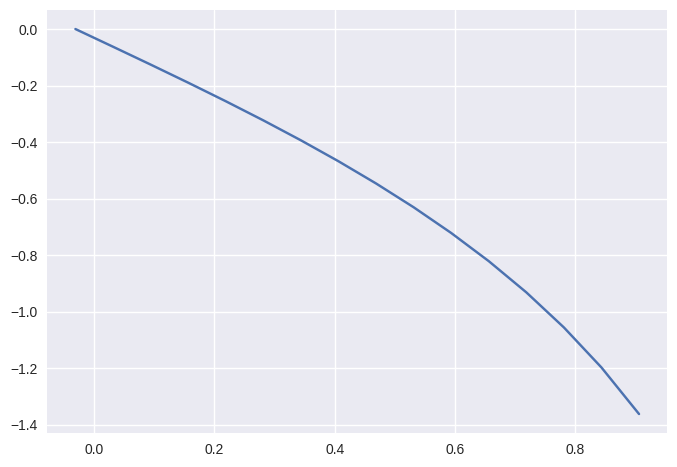

In [42]:
integrator_soln = integrate.odeint(_integrator, [0, -1], x)
plt.plot(x, integrator_soln[:,0])

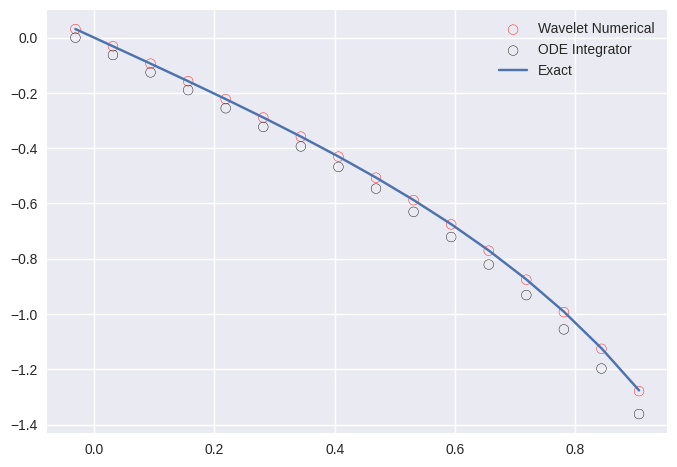

In [40]:
#plt.plot(x, y, marker='.',  markerfacecolor='white', markersize=24, label="Wavelet Numerical")
plt.scatter(x, y, facecolors='none', edgecolors='r', label="Wavelet Numerical")
#plt.plot(x, y, 'o', mfc='none', label="Wavelet Numerical")
plt.scatter(x, integrator_soln[:,0], facecolors='none', edgecolors='k',  label="ODE Integrator")
plt.plot(x, yexact, label="Exact")
plt.legend()

In [15]:
x.reshape(N, 1)


array([[-0.03125],
       [ 0.03125],
       [ 0.09375],
       [ 0.15625],
       [ 0.21875],
       [ 0.28125],
       [ 0.34375],
       [ 0.40625],
       [ 0.46875],
       [ 0.53125],
       [ 0.59375],
       [ 0.65625],
       [ 0.71875],
       [ 0.78125],
       [ 0.84375],
       [ 0.90625]])

In [17]:
x[9]

0.53125

In [ ]:
y = np.zeros((N, 1)) 

for j in range(N): 
    S = 0 
    for i in range(N): 
        S += a[i] * pi2(x[j], i, J) 
    
    y[j] = alpha1 * x[j] * beta1 + S